In [1]:
IS_RUNNING_GOOGLE_DRIVE = True  # @param {type:"boolean"}

In [2]:
if IS_RUNNING_GOOGLE_DRIVE:
    from google.colab import drive

    drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [4]:
if IS_RUNNING_GOOGLE_DRIVE:
    reviews_df = pd.read_csv(
        "/content/drive/MyDrive/UFMT/Gestão e Ciência de Dados/Disciplinas/14 - Seminário e Metodologia da Pesquisa/Projetos/glassdoor-reviews-report/glassdoor_reviews_predicted.csv"
    )
else:
    reviews_df = pd.read_csv("./glassdoor_reviews_predicted.csv")

In [5]:
reviews_df.head()

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,predicted_sentiment,sentiment_label
0,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano","Companheirismo entre os colegas, oportunidade ...",2023-12-15,5.0,1,0,1,Positivo
1,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano",Não tive nenhum ponto negativo,2023-12-15,5.0,0,1,0,Neutro
2,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Equipe bem prestativa e ótima de se trabalhar.,2023-03-11,4.0,1,0,1,Positivo
3,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Modo home office ainda tem que ser melhorado.,2023-03-11,4.0,2,0,2,Negativo
4,60212043,Tecnomapas,Funcionário confidencial,"Ex-funcionário(a), menos de um ano",Única vantagem era o trabalho ser home office,2022-02-24,1.0,0,1,0,Neutro


In [6]:
reviews_df["sentiment"] = reviews_df["sentiment"].apply(lambda x: 2 if x == -1 else x)

In [7]:
# reviews_df[reviews_df["sentiment"] != reviews_df["predicted_sentiment"]]

### Neutral predictions

In [8]:
true_0_predicted_0 = len(
    reviews_df[
        (reviews_df["sentiment"] == 0) & (reviews_df["predicted_sentiment"] == 0)
    ]
)
true_0_predicted_0

241

In [9]:
true_0_predicted_1 = len(
    reviews_df[
        (reviews_df["sentiment"] == 0) & (reviews_df["predicted_sentiment"] == 1)
    ]
)
true_0_predicted_1

1

In [10]:
true_0_predicted_2 = len(
    reviews_df[
        (reviews_df["sentiment"] == 0) & (reviews_df["predicted_sentiment"] == 2)
    ]
)
true_0_predicted_2

0

### Positive predictions

In [11]:
true_1_predicted_1 = len(
    reviews_df[
        (reviews_df["sentiment"] == 1) & (reviews_df["predicted_sentiment"] == 1)
    ]
)
true_1_predicted_1

1259

In [12]:
true_1_predicted_0 = len(
    reviews_df[
        (reviews_df["sentiment"] == 1) & (reviews_df["predicted_sentiment"] == 0)
    ]
)
true_1_predicted_0

6

In [13]:
true_1_predicted_2 = len(
    reviews_df[
        (reviews_df["sentiment"] == 1) & (reviews_df["predicted_sentiment"] == 2)
    ]
)
true_1_predicted_2

4

### Negative predictions

In [14]:
true_2_predicted_2 = len(
    reviews_df[
        (reviews_df["sentiment"] == 2) & (reviews_df["predicted_sentiment"] == 2)
    ]
)
true_2_predicted_2

1000

In [15]:
true_2_predicted_0 = len(
    reviews_df[
        (reviews_df["sentiment"] == 2) & (reviews_df["predicted_sentiment"] == 0)
    ]
)
true_2_predicted_0

7

In [16]:
true_2_predicted_1 = len(
    reviews_df[
        (reviews_df["sentiment"] == 2) & (reviews_df["predicted_sentiment"] == 1)
    ]
)
true_2_predicted_1

14

### Confusion matrix

In [17]:
# y_true = [0] * 242 + [1] * 1269 + [2] * 1021
# y_pred = [0] * 223 + [1] * 1257 + [2] * 1052

In [18]:
# y_true = reviews_df["sentiment"].to_numpy()
# y_pred = y_true = reviews_df["predicted_sentiment"].to_numpy()

In [19]:
# y_true[:10]

In [20]:
# y_pred[:10]

In [21]:
# cm = confusion_matrix(y_true, y_pred)

In [22]:
cm = np.array(
    [
        [true_0_predicted_0, true_0_predicted_1, true_0_predicted_2],
        [true_1_predicted_0, true_1_predicted_1, true_1_predicted_2],
        [true_2_predicted_0, true_2_predicted_1, true_2_predicted_2],
    ]
)

In [23]:
cm

array([[ 241,    1,    0],
       [   6, 1259,    4],
       [   7,   14, 1000]])

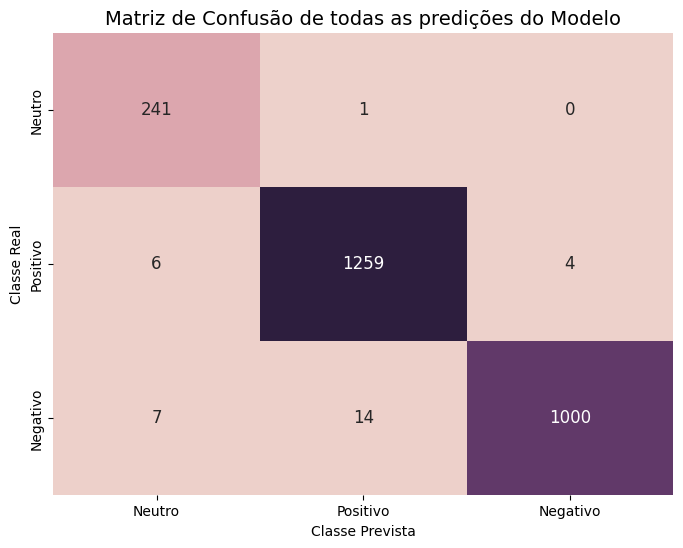

In [24]:
fig, ax = plt.subplots(1, figsize=(8, 6))
sns.heatmap(
    data=cm,
    annot=True,
    fmt="d",
    annot_kws={
        "fontsize": 12,
    },
    cbar=False,
    cmap=sns.cubehelix_palette(as_cmap=True),  # "Blues",
    xticklabels=["Neutro", "Positivo", "Negativo"],
    yticklabels=["Neutro", "Positivo", "Negativo"],
    ax=ax,
)

ax.set_ylabel("Classe Real")
ax.set_xlabel("Classe Prevista")
ax.set_title(
    "Matriz de Confusão de todas as predições do Modelo",
    loc="center",
    fontsize=14,
)

plt.savefig(
    "confusion_matrix.png",
    transparent=False,
    dpi=300,
    # bbox_inches="tight",
)

plt.show()

### Model evaluation

In [25]:
def calculate_precision(TP, FP):
    if (TP + FP) > 0:
        return TP / (TP + FP)

    return 0.0

In [26]:
def calculate_recall(TP, FN):
    if (TP + FN) > 0:
        return TP / (TP + FN)

    return 0.0

In [27]:
def calculate_f1_score(precision, recall):
    if (precision + recall) > 0:
        return 2 * (precision * recall) / (precision + recall)

    return 0.0

In [28]:
def calculate_accuracy(total_correct, total_predictions):
    if total_predictions > 0:
        return total_correct / total_predictions

    return 0.0

In [29]:
cm.shape[0]

3

In [30]:
def calculate_metrics(cm):
    total_predictions = np.sum(cm)

    for i in range(cm.shape[0]):
        total_correct = 0

        print(f"{'-'*10} Class: {i} {'-'*10}")

        TP = cm[i, i]  # True Positives
        print(f"TP: {TP}")

        FP = np.sum(cm[:, i]) - TP  # False Positives
        print(f"FP: {FP}")

        FN = np.sum(cm[i, :]) - TP  # False Negatives
        print(f"FN: {FN}")

        TN = np.sum(cm) - (TP + FP + FN)  # True Negatives

        print(f"TN: {TN}")

        total_correct += TP + TN

        precision = calculate_precision(TP, FP)
        recall = calculate_recall(TP, FN)
        f1_score = calculate_f1_score(precision, recall)
        accuracy = calculate_accuracy(total_correct, total_predictions)

        print(
            f"Precision = {precision:.2f}, Recall = {recall:.2f}, Accuracy: {accuracy:.2f}, F1 Score = {f1_score:.2f}\n"
        )

In [31]:
calculate_metrics(cm)

---------- Class: 0 ----------
TP: 241
FP: 13
FN: 1
TN: 2277
Precision = 0.95, Recall = 1.00, Accuracy: 0.99, F1 Score = 0.97

---------- Class: 1 ----------
TP: 1259
FP: 15
FN: 10
TN: 1248
Precision = 0.99, Recall = 0.99, Accuracy: 0.99, F1 Score = 0.99

---------- Class: 2 ----------
TP: 1000
FP: 4
FN: 21
TN: 1507
Precision = 1.00, Recall = 0.98, Accuracy: 0.99, F1 Score = 0.99



## Model Erros

### Neutral Class

In [32]:
reviews_df[(reviews_df["sentiment"] == 0) & (reviews_df["predicted_sentiment"] != 0)]

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,predicted_sentiment,sentiment_label
2480,27080813,Redeflex,Frentista,"Ex-funcionário(a), menos de um ano",Salário razoável para a função. Esse é o único...,2018-10-17,2.0,0,1,1,Positivo


### Positive Class

In [33]:
reviews_df[(reviews_df["sentiment"] == 1) & (reviews_df["predicted_sentiment"] != 1)]

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,predicted_sentiment,sentiment_label
114,50085799,Abaco Tecnologia de Informação Ltda,Analista De Sistemas Júnior,"Funcionário(a) atual, mais de 3 anos",Não há muita pressão para executar o trabalho ...,2021-07-21,3.0,1,0,0,Neutro
202,67307904,Agenda Assessoria,Desenvolvedor Sênior,Funcionário(a) atual,Existem vários prós para esta empresa.,2022-07-29,5.0,1,0,0,Neutro
554,63603929,Amaggi,Funcionário confidencial,"Funcionário(a) atual, menos de um ano","benefícios, benefícios, benefícios, benefícios...",2022-05-03,4.0,1,0,2,Negativo
876,26616236,Amaggi,Assistente De Planejamento,Funcionário(a) atual,"Busca valorizar o profissional INTERNO, capaci...",2015-01-25,4.0,1,0,2,Negativo
1203,68876151,Cigam Software Corporativo,Coordenadora Comercial,"Funcionário(a) atual, mais de 5 anos","Não vejo cvontras, acredito que a empresa semp...",2022-09-09,5.0,1,1,0,Neutro
1264,64925288,Cigam Software Corporativo,Estagiário,Funcionário(a) atual,Todos os ppossíveis em qualquer parte da empresa,2022-05-31,5.0,1,0,0,Neutro
1286,55497539,Cigam Software Corporativo,Assistente Administrativo,Funcionário(a) atual,Informa o salário base dos cargos,2021-11-17,5.0,1,0,2,Negativo
1540,70274520,DSS Tecnologia,Funcionário confidencial,"Funcionário(a) atual, mais de um ano","Gerentes de projeto não ficam no pé, você tem ...",2022-10-18,2.0,1,0,2,Negativo
2150,64944347,"Log, Lab. Inteligência Digital",Funcionário confidencial,Ex-funcionário(a),a equipe tenta se ajudar,2022-06-01,2.0,1,0,0,Neutro
2433,48114617,Redeflex,Vendedor Externo,Ex-funcionário(a),"não tem, só boas recomendações a empresa.",2021-06-09,5.0,1,1,0,Neutro


### Negative Class

In [34]:
reviews_df[(reviews_df["sentiment"] == 2) & (reviews_df["predicted_sentiment"] != 2)]

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,predicted_sentiment,sentiment_label
75,72522531,Abaco Tecnologia de Informação Ltda,Analista De Requisitos,"Ex-funcionário(a), mais de um ano",Salário e benefícios de ticket refeição baixo....,2023-01-11,2.0,2,0,1,Positivo
133,37937817,Abaco Tecnologia de Informação Ltda,UX Designer,Funcionário(a) atual,nem queria avaliar o glassdor esta me obrigand...,2020-11-03,3.0,2,0,0,Neutro
181,76885180,Agenda Assessoria,Recenseador,"Funcionário(a) atual, menos de um ano",Apenas 20 reais de vale alimentação/moblidade.,2023-05-29,5.0,2,0,1,Positivo
243,29736642,Agenda Assessoria,Funcionário confidencial,Funcionário(a) atual,Uma empresa foca no atendimento a prazos bem r...,2019-10-10,5.0,2,0,1,Positivo
263,82855955,Amaggi,Gerente De Compras,"Ex-funcionário(a), mais de 5 anos","Não tem contra, só o fato de ser uma empresa g...",2023-12-26,3.0,2,0,0,Neutro
285,82096525,Amaggi,Produção ou coordenação de produção,Funcionário(a) atual,Aprendizado e valores do empregado,2023-11-26,5.0,2,0,1,Positivo
327,79530371,Amaggi,Analista De Planejamento E Controle De Manutenção,Ex-funcionário(a),Clima de competitividade entre algumas unidade...,2023-08-27,5.0,2,0,1,Positivo
382,76698581,Amaggi,Funcionário confidencial,Funcionário(a) atual,Trabalhar sobre pressão e em ambiente dinâmico,2023-05-23,3.0,2,1,1,Positivo
875,26599826,Amaggi,Classificador De Cereais,Funcionário(a) atual,"Baixo Salário, varias funções operacionais den...",2014-11-17,3.0,2,0,1,Positivo
973,40762816,Amaggi,Auxiliar Administrativo,Funcionário(a) atual,"Salário, carga horária, trabalha feriados, fin...",2021-01-15,5.0,2,0,1,Positivo
